In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [2]:
from preprocess_dataset import standardised_X, dummy_Y

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [3]:
from keras.models import Sequential
from keras.layers import Dense

In [4]:
from sklearn.metrics import confusion_matrix

In [5]:
def create_baseline():
    # create the model
    model = Sequential()
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, kernel_initializer='normal', activation='sigmoid'))
    # Compile model. We use the the logarithmic loss function, and the Adam gradient optimizer.
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [6]:
model = create_baseline()
history = model.fit(standardised_X, dummy_Y, validation_split = 0.1, epochs = 30)

Train on 18000 samples, validate on 2000 samples
Epoch 1/30
18000/18000 [==============================] - 1s 65us/step - loss: 1.0402 - acc: 0.5684 - val_loss: 0.5236 - val_acc: 0.9440
Epoch 2/30
18000/18000 [==============================] - 1s 49us/step - loss: 0.5293 - acc: 0.7951 - val_loss: 0.4046 - val_acc: 0.9405
Epoch 3/30
18000/18000 [==============================] - 1s 49us/step - loss: 0.4794 - acc: 0.8098 - val_loss: 0.4122 - val_acc: 0.9405
Epoch 4/30
18000/18000 [==============================] - 1s 48us/step - loss: 0.4658 - acc: 0.8104 - val_loss: 0.4035 - val_acc: 0.9405
Epoch 5/30
18000/18000 [==============================] - 1s 50us/step - loss: 0.4587 - acc: 0.8105 - val_loss: 0.3980 - val_acc: 0.9405
Epoch 6/30
18000/18000 [==============================] - 1s 48us/step - loss: 0.4536 - acc: 0.8107 - val_loss: 0.3679 - val_acc: 0.9405
Epoch 7/30
18000/18000 [==============================] - 1s 51us/step - loss: 0.4485 - acc: 0.8109 - val_loss: 0.3727 - val_acc:

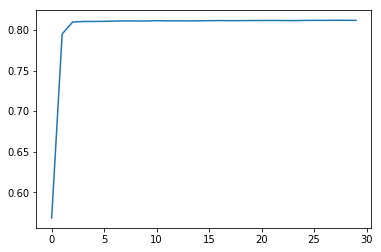

In [7]:
plt.plot(history.history['acc'])

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 160       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
Total params: 205
Trainable params: 205
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.get_weights()

[array([[-6.65842116e-01,  2.65723437e-01,  1.33382259e-02,
          6.45758629e-01, -1.67839937e-02, -6.51467025e-01,
         -3.41096699e-01, -5.62304795e-01],
        [ 5.47711313e-01,  1.06442869e+00, -5.16942501e-01,
          1.02171743e+00,  6.35653853e-01,  9.60885406e-01,
         -1.10583296e-02,  9.52431321e-01],
        [-5.34863584e-02, -7.36550465e-02,  3.20808619e-01,
         -1.60662904e-01,  7.96471629e-03, -1.72281414e-01,
         -8.52706283e-03,  5.73841743e-02],
        [-1.55410454e-01, -1.01750590e-01, -1.42934233e-01,
          1.65484041e-01,  1.27984852e-01,  4.45696741e-01,
         -1.47476971e-01, -4.36405987e-02],
        [ 4.01314884e-01,  5.55454075e-01, -1.54149204e-01,
         -1.05156064e-01,  2.46574551e-01,  1.17652021e-01,
          7.34889925e-01,  1.02787748e-01],
        [ 1.01617897e+00, -4.70431685e-01,  1.08795963e-01,
         -3.58167291e-01, -3.06439459e-01,  8.52156579e-01,
         -3.37782413e-01,  6.58469200e-01],
        [-4.0900

In [10]:
predict = model.predict(standardised_X, verbose=1)

20000/20000 [==============================] - 0s 12us/step


In [11]:
predict_new = np.zeros_like(predict)
predict_new[np.arange(len(predict)), predict.argmax(1)] = 1
print(predict_new)

[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [12]:
count1 = [0]*5
count2=0

In [13]:
for prediction_new in predict_new:
    count2=count2+1
    if(prediction_new[0] == 1):
        count1[0]+=1
    elif(prediction_new[1] == 1):
        count1[1]+=1
    elif(prediction_new[2] == 1):
        count1[2]+=1
    elif(prediction_new[3] == 1):
        count1[3]+=1
    elif(prediction_new[4] == 1):
        count1[4]+=1

In [14]:
print(count1)
print(count2)

[3800, 7070, 4112, 1389, 3629]
20000


In [15]:
y_true = []
y_pred = []
count = 0

In [16]:
for true_vector in dummy_Y:
    count+=1
    if(true_vector[0] == 1):
        y_true.append('a')
    elif(true_vector[1] == 1):
        y_true.append('b')
    elif(true_vector[2] == 1):
        y_true.append('c')
    elif(true_vector[3] == 1):
        y_true.append('d')
    elif(true_vector[4] == 1):
        y_true.append('e')

In [17]:
for true_vector in predict_new:
    if(true_vector[0] == 1):
        y_pred.append('a')
    elif(true_vector[1] == 1):
        y_pred.append('b')
    elif(true_vector[2] == 1):
        y_pred.append('c')
    elif(true_vector[3] == 1):
        y_pred.append('d')
    elif(true_vector[4] == 1):
        y_pred.append('e')

In [18]:
print(count)
print(len(y_true))
print(len(y_pred))

20000
20000
20000


In [19]:
confusion_matrix(y_true, y_pred)

array([[3783,    0,  217,    0,    0],
       [   0, 3961,    5,   34,    0],
       [   0,  229, 3770,    1,    0],
       [  17, 2511,  120, 1352,    0],
       [   0,  369,    0,    2, 3629]])